ChatGPT2 by OpenAI has created a big change in the field of Artificial Intelligence. It is open sourced transformed based model trained on millions of web pages and papers.

**What are transformers?** A transformer is a deep learning model that uses the mechanism of self-attention, differentially weighting the significance of each part of the input (which includes the recursive output) data. It is used primarily in the fields of natural language processing (NLP) and computer vision (CV).

Self-attention is a mechanism for the network to contextualize words by paying attention to other words that make up its context in a body of text. The idea of self-attention is similar to the idea of attention introduced earlier, except that it’s used to contextualize words in a sentence as opposed to aligning words across translation as shown above.

Consider these two sentences:



1.   The doors of the **jaguar** are open.
2.   The **jagaur** howled loudly.

The first sentence is talking about a car and the second is talking about the animal. To solve this problem, transformer models use neural networks to generate a vector and key pair.



**Generative pretrained transformers(GPT)** are a family of Transformer models trained by OpenAI for Language Modeling tasks. Few decoding methods can be applied on these models to get even better results.

In this notebook we can observe different decoding methods such as Greedy search, Beam search, Top-K sampling and Top-p sampling that are applied on the models from transformers library.

In [1]:
import pandas as pd
import numpy as np

In [2]:
input_sequence= "The quick brown fox"

In [3]:
!pip install transformers
#from transformers import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.0 MB/s eta 0:00:00


In [4]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

In [5]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")   # large GPT2 tokenizer and GPT2 model
GPT2_model = TFGPT2LMHeadModel.from_pretrained("gpt2-large", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [6]:
GPT2_model.summary()

Model: "tfgpt2lm_head_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 774030080 
 r)                                                              
                                                                 
Total params: 774,030,080
Trainable params: 774,030,080
Non-trainable params: 0
_________________________________________________________________


It can be see that GPT2 has 774M parameters.

In [7]:
import tensorflow as tf
tf.random.set_seed(0)

## Utilizing only GPT2 (Greedy search)

Greedy search simply selects the word with the highest probability as its next word.The following sketch shows greedy search: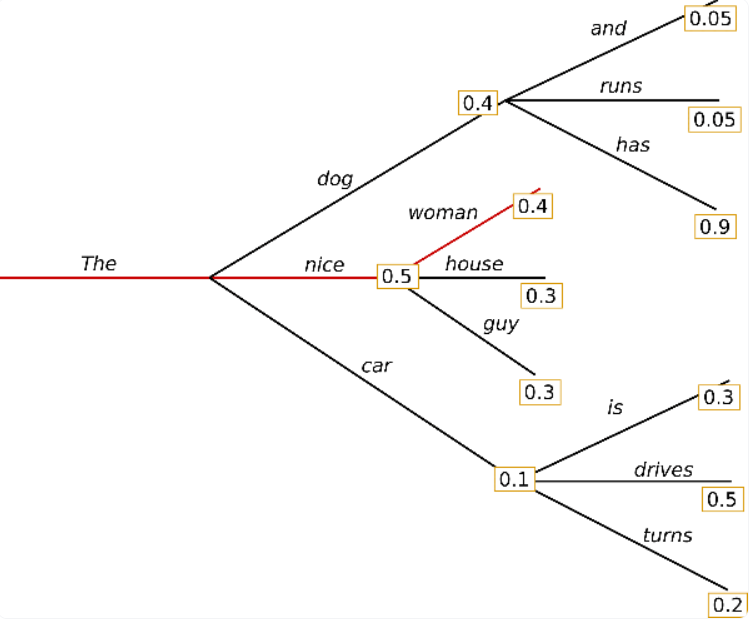

The red line indicates the output that will be generated due to the high probability.

In [8]:
input_ids = tokenizer.encode(input_sequence, return_tensors='tf') # encode context

In [9]:
output_tokens = GPT2_model.generate(input_ids, max_length=50, num_return_sequences=3, do_sample=True) #Generate output of length 50

In [10]:
output_text = [tokenizer.decode(output_token,skip_special_tokens=True) for output_token in output_tokens] #decode

In [11]:
for i, output_tokens in enumerate(output_tokens):
      print("{}: {}".format(i, tokenizer.decode(output_tokens, skip_special_tokens=True)))

0: The quick brown fox jumps over the lazy dog that keeps trotting behind him," O'Brien writes, "the fox is not too upset with the dog in a general way — he just won't let him go too far, so he keeps
1: The quick brown fox jumps over the lazy dog." [3]

"The quick brown fox jumps over the lazy dog." "Homer, when I'm finished with them, I'll put them all in a barrel." [2]

2: The quick brown fox jumped out of the window, looked down the street and looked back at the person watching him. A small moment of panic crossed his face before his face relaxed. "He's coming!" he commanded. He jumped out and spun and


The output seems to be so random.

The major drawback of greedy search though is that it misses high probability words hidden behind a low probability word as it can observed in the diagram.

## Beam Search

It is similar to greedy search except that it keeps track of the second most  likely one using **num_beams.**
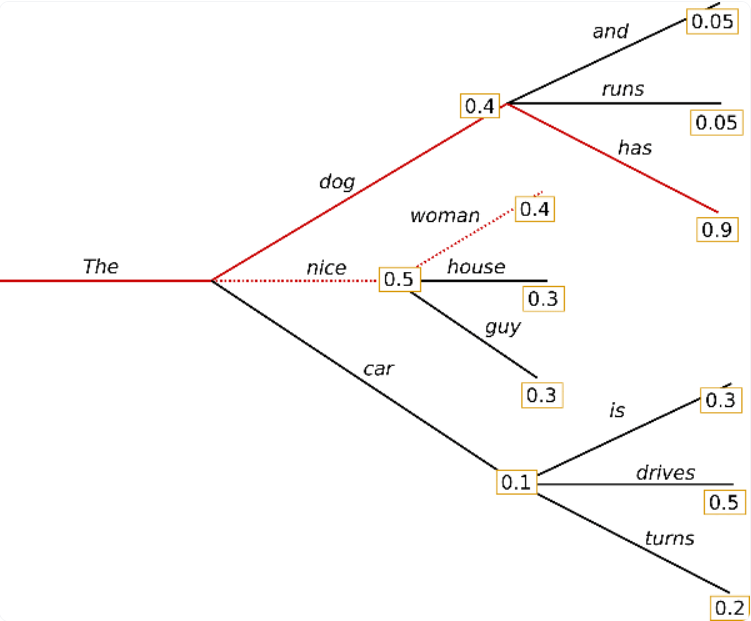

It is keeping track of two most likely outcomes( as num_beams is 2).

In [12]:
beam_output = GPT2_model.generate(
    input_ids, 
    max_length=50, 
    num_beams=4, 
    num_return_sequences = 4,
    no_repeat_ngram_size=2,
    early_stopping=True
)


In [13]:
# Decode the generated sequences into human-readable text
generated_sequences = []
for sequence in beam_output:
    generated_sequence = tokenizer.decode(sequence, clean_up_tokenization_spaces=True)
    generated_sequences.append(generated_sequence)

In [14]:
print("Starting sentence:", input_sequence)
print("Generated sequences:", generated_sequences)
print("Most probable sequence:", generated_sequences[0])

Starting sentence: The quick brown fox
Generated sequences: ['The quick brown fox jumps over the lazy dog."\n\n"I\'m not lazy," I said. "I just don\'t have the energy to do it all the time. I\'m just not that good at it. It\'s not like I', 'The quick brown fox jumps over the lazy dog."\n\n"I\'m not lazy," I said. "I just don\'t have the energy to do it all the time. I\'m just not that good at it. It\'s a lot of', 'The quick brown fox jumps over the lazy dog."\n\n"I\'m not lazy," I said. "I just don\'t have the energy to do it all the time. I\'m just not that good at it. It\'s not my thing', 'The quick brown fox jumps over the lazy dog."\n\n"I\'m not lazy," I said. "I just don\'t have the energy to do it all the time. I\'m just not that good at it. It\'s not my fault']
Most probable sequence: The quick brown fox jumps over the lazy dog."

"I'm not lazy," I said. "I just don't have the energy to do it all the time. I'm just not that good at it. It's not like I


In [15]:
for i, beam_output in enumerate(beam_output):
      print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

0: The quick brown fox jumps over the lazy dog."

"I'm not lazy," I said. "I just don't have the energy to do it all the time. I'm just not that good at it. It's not like I
1: The quick brown fox jumps over the lazy dog."

"I'm not lazy," I said. "I just don't have the energy to do it all the time. I'm just not that good at it. It's a lot of
2: The quick brown fox jumps over the lazy dog."

"I'm not lazy," I said. "I just don't have the energy to do it all the time. I'm just not that good at it. It's not my thing
3: The quick brown fox jumps over the lazy dog."

"I'm not lazy," I said. "I just don't have the energy to do it all the time. I'm just not that good at it. It's not my fault


As can be seen, the four beam hypotheses are only marginally different to each other. But if we increaed num_beams, then we would see some more variation in the separate beams.

Research shows that human languages do not follow this 'high probability word next' distribution. This makes sense - if my words were exactly what you expected them to be, I would be quite a boring person and most people don't want to be boring! Hence beam search is suitable for cases such as summarization but not for dialogs.

## Sampling

Instead of following a strict path to find the end text with the highest probability, we randomly pick the next word by its conditional probability distribution. ( Lot of math involved).

Introducing randomness may lead to inconsistency or no logic sentences. Hence temeprature parameter is utilized This temperature parameter increases the chances of high probability words and decreases the chances of low probability words in the sampling.

In [16]:
tf.random.set_seed(0)

# use temperature to decrease the sensitivity to low probability candidates
sample_output = GPT2_model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0, 
    temperature=0.7
)


In [17]:
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

The quick brown fox jumps over the lazy dog and jumps into the window with the lazy dog in its jaws. The quick brown fox jumps over the lazy dog and jumps in the window with the lazy dog in its jaws. The quick brown fox jumps over


While applying temperature can make a distribution less random, in its limit, when setting temperature approximately to 0, temperature scaled sampling becomes equal to greedy decoding and will suffer from the same problems as before.

## Top-k sampling

Here, instead of increasing the chances of high probability words  and decreasing the chances of low probabillity words, we just remove low probability words all together. The top k most likely next words are selected and the entire probability mass is shifted to these k words.

**GPT2 adopted this sampling scheme, which was one of the reasons for its success in story generation**

We need to set top_k to however many of the top words we want to consider for our conditional probability distribution.

In [18]:
tf.random.set_seed(0)

# set top_k to 50
sample_output = GPT2_model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50,
    num_return_sequences = 4,
    top_k=50
)


In [19]:
for i, s in enumerate(sample_output):
      print("{}: {}".format(i, tokenizer.decode(s, skip_special_tokens=True)))

0: The quick brown fox jumps over the lazy dog that keeps trotting behind him," O'Brien writes, "the fox is not too upset with the dog in a general way — he just won't let him go too far, so he keeps
1: The quick brown fox jumps out of the bush with claws outstretched, just like it does when trying to catch any other creature.

They just have this natural ability to catch predators where there may already be one. What's more is that with
2: The quick brown fox jumped out of the window, looked down the street and looked back at the person watching him. A small moment of panic crossed his face before his face relaxed. "He's coming!" he commanded. He jumped out and spun and
3: The quick brown fox jumps over the lazy dog and onto the tracks, hopping down them like he's nothing. His eyes are wide and wide, taking in everything that's happened around him.

He stares at the track again and begins jumping up


## Top-p (nucleus) sampling

Rather than selecting the top k most likely words, we select the smallest set of words whose total probability is greater than p (set value), and the entire probability mass is shifted to the words in this set.

In [20]:
# using both top_k and top_p
sample_outputs = GPT2_model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=3
)

In [21]:
print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: The quick brown fox jumps the fence," she told me. "It jumps in and stays forever, then jumps off, and a couple of days later, there's a coyote or a mountain lion. And then they're gone."

In
1: The quick brown fox jumps from its hole."

This little story is repeated in a few places; but if we go back to our story from a moment ago, this is the beginning.

And then we know the way, or the
2: The quick brown fox jumped back in her foxy way and looked at the floor. "I told you what I have to do. You see, I will be an honorary apprentice. And by honorary... you mean you only will be able to use


Top-p can also be combined with Top-K to avoid very low ranked words while still allowing for some dynamic selection.



Top-p and top-K sampling appear to produce more fluent text than traditional greedy and beam search on open-ended language generation.

Open-ended language generation is a rapidly evolving field of study, and as is often the case, there is no one-size-fits-all solution, so one must determine what works best in one's specific use case.